<a href="https://colab.research.google.com/github/Rachita-G/Python_Practice/blob/main/Packages/SciPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SciPy

SciPy is a collection of mathematical algorithms and convenience functions built on the Numpy extension of Python. It adds significant power to the interactive Python session by providing the user with high-level commands and classes for manipulating and visualizing data. With SciPy an interactive Python session becomes a data-processing and system-prototyping environment rivaling systems such as MATLAB, IDL, Octave, R-Lab, and SciLab.

The additional benefit of basing SciPy on Python is that this also makes a powerful programming language available for use in developing sophisticated programs and specialized applications. Scientific applications using SciPy benefit from the development of additional modules in numerous niches of the software landscape by developers across the world. 

Everything from parallel programming to web and data-base subroutines and classes have been made available to the Python programmer. All of this power is available in addition to the mathematical libraries in SciPy.

- adds functionality for statistics,signal processing, computer vision etc.
- Standard normal--> Multivariate Normal
- PDF,CDF
- Convolution (used in deep learning, signal processing, computer vision etc.)

We'll focus a lot more on NumPy arrays, but let's show some of the capabilities of SciPy:

In [2]:
import numpy as np
A = np.array([[1,2,3],[4,5,6],[7,8,8]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 8]])

## Linear Algebra
**linalg**

In [3]:
from scipy import linalg

Determinant of a Matrix

In [4]:
# Compute the determinant of a matrix
linalg.det(A)

3.0

Compute pivoted LU decomposition of a matrix.

The decomposition is::

    A = P L U

where P is a permutation matrix, L lower triangular with unit
diagonal elements, and U upper triangular.

In [5]:
P, L, U = linalg.lu(A)

In [6]:
P

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [7]:
L

array([[1.        , 0.        , 0.        ],
       [0.14285714, 1.        , 0.        ],
       [0.57142857, 0.5       , 1.        ]])

In [8]:
U

array([[7.        , 8.        , 8.        ],
       [0.        , 0.85714286, 1.85714286],
       [0.        , 0.        , 0.5       ]])

In [9]:
np.dot(L,U)

array([[7., 8., 8.],
       [1., 2., 3.],
       [4., 5., 6.]])

We can find out the eigenvalues and eigenvectors of this matrix:

In [10]:
EW, EV = linalg.eig(A)

In [11]:
EW

array([15.55528261+0.j, -1.41940876+0.j, -0.13587385+0.j])

In [12]:
EV

array([[-0.24043423, -0.67468642,  0.51853459],
       [-0.54694322, -0.23391616, -0.78895962],
       [-0.80190056,  0.70005819,  0.32964312]])

Solving systems of linear equations can also be done:

In [14]:
v = np.array([[2],[3],[5]])
v

array([[2],
       [3],
       [5]])

In [16]:
s = linalg.solve(A,v)
s

array([[-2.33333333],
       [ 3.66666667],
       [-1.        ]])

## Sparse Linear Algebra
SciPy has some routines for computing with sparse and potentially very large matrices. The necessary tools are in the submodule scipy.sparse.

We make one example on how to construct a large matrix:

In [17]:
from scipy import sparse

In [19]:
# Row-based linked list sparse matrix
A = sparse.lil_matrix((1000, 1000))
A

<1000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in List of Lists format>

In [20]:
A[0,:100] = np.random.rand(100)

In [21]:
A[1,100:200] = A[0,:100]

In [22]:
A.setdiag(np.random.rand(1000))

In [23]:
A

<1000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1199 stored elements in List of Lists format>

**Linear Algebra for Sparse Matrices**

In [24]:
from scipy.sparse import linalg

In [25]:
# Convert this matrix to Compressed Sparse Row format.
A.tocsr()

<1000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1199 stored elements in Compressed Sparse Row format>

In [26]:
A = A.tocsr()

In [27]:
b = np.random.rand(1000)

In [29]:
linalg.spsolve(A, b)[:10]

array([ 1.55316332e+02, -3.21973720e+02,  1.09900164e+00,  1.12634337e+00,
        1.13515682e+00,  1.94458382e-01,  1.04969444e+02,  1.29750482e-01,
        1.95655862e+00,  4.76529314e-01])

# PDF AND CDF

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm # for normal- similarly can go foe beta, gamma etc.

In [32]:
x=np.linspace(-6,6,1000)
x[:10]

array([-6.        , -5.98798799, -5.97597598, -5.96396396, -5.95195195,
       -5.93993994, -5.92792793, -5.91591592, -5.9039039 , -5.89189189])

In [33]:
fx=norm.pdf(x,loc=0,scale=1) # loc is mean and scale is standard deviation

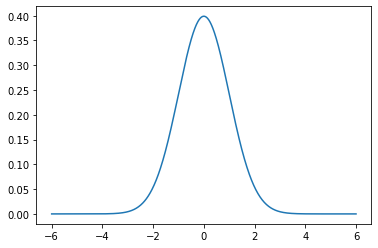

In [34]:
plt.plot(x,fx) # std normal pdf

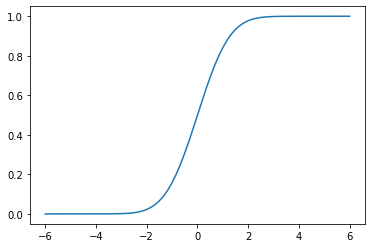

In [35]:
Fx=norm.cdf(x,loc=0,scale=1)
plt.plot(x,Fx);

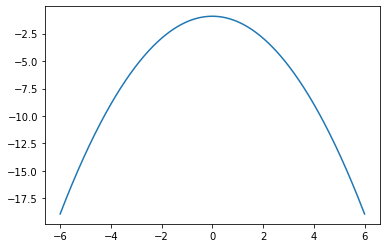

In [36]:
logfx=norm.logpdf(x,loc=0,scale=1)
plt.plot(x,logfx);

# CONVOLUTION

In [37]:
from PIL import Image
%pwd

'/content'

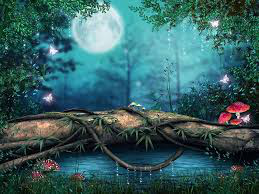

In [ ]:
im=Image.open('C:\\Users\\sanjana grover\\Pictures\\download.jpg')
im

In [ ]:
gray=np.mean(im,axis=2)
gray.shape

(194, 259)

In [ ]:
x=np.linspace(-6,6,50)
fx=norm.pdf(x,loc=0,scale=1)
# guassian filter
filt=np.outer(fx,fx)

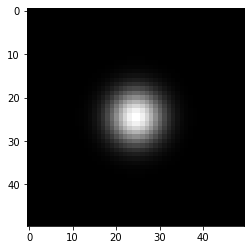

In [ ]:
plt.imshow(filt,cmap='gray')

In [ ]:
from scipy.signal import convolve2d

In [ ]:
out=convolve2d(gray,filt)

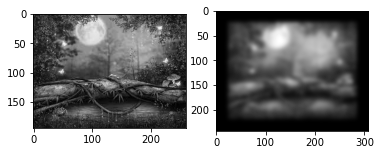

In [ ]:
plt.subplot(1,2,1)
plt.imshow(gray,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(out,cmap='gray')

There is a lot more that SciPy is capable of, such as Fourier Transforms, Bessel Functions, etc...

You can reference the Documentation for more details!